# Explore Dataset

### GDrive Setup

In [1]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google'

In [2]:
cd 'drive/My Drive/Colab Notebooks/4th year project/OULAD dataset'

/content/drive/My Drive/Colab Notebooks/4th year project/OULAD dataset


In [2]:
ls

 Volume in drive C is Windows-SSD
 Volume Serial Number is 6277-B36E

 Directory of C:\Users\rober\OneDrive - University of Glasgow\Fourth Year\4th year project\fourth-year-project\notebooks\explore_dataset-initial_predictions

28/02/2022  20:17    <DIR>          .
28/02/2022  19:44    <DIR>          ..
28/02/2022  20:17    <DIR>          .ipynb_checkpoints
28/02/2022  20:17           180,867 explore_dataset.ipynb
28/02/2022  19:44           585,999 oulad_dataset_predictions.ipynb
               2 File(s)        766,866 bytes
               3 Dir(s)  48,635,056,128 bytes free


## Open University Data

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
assessments_data_frame = pd.read_csv('../dataset/anonymisedOUDataSet/assessments.csv')
courses_data_frame = pd.read_csv('../OULAD dataset/anonymisedOUDataSet/courses.csv')
student_assessments_data_frame = pd.read_csv('../OULAD dataset/anonymisedOUDataSet/studentAssessment.csv')
student_info_data_frame = pd.read_csv('../OULAD dataset/anonymisedOUDataSet/studentInfo.csv')
student_registration_data_frame = pd.read_csv('../OULAD dataset/anonymisedOUDataSet/studentRegistration.csv')
student_vle_data_frame = pd.read_csv('../OULAD dataset/anonymisedOUDataSet/studentVle.csv')
vle_data_frame = pd.read_csv('../OULAD dataset/anonymisedOUDataSet/vle.csv')

sa_days_deadline_df = pd.read_csv('../OULAD dataset/StudentAssessmentDaysDeadline.csv')

sns.set(rc={'figure.figsize':(11.7,8.27)})

### Assessments

* code_module – identification code of the module, to which the assessment belongs.
* code_presentation - identification code of the presentation, to which the assessment belongs.
* id_assessment – identification number of the assessment.
* assessment_type – type of assessment. Three types of assessments exist: Tutor Marked Assessment (TMA), Computer Marked Assessment (CMA) and Final Exam (Exam).
* date – information about the final submission date of the assessment calculated as the number of days since the start of the module-presentation. The starting date of the presentation has number 0 (zero).
* weight - weight of the assessment in %. Typically, Exams are treated separately and have the weight 100%; the sum of all other assessments is 100%.

If the information about the final exam date is missing, it is at the end of the last presentation week.

In [6]:
assessments_data_frame.loc[assessments_data_frame["id_assessment"]==24282]

,code_module,code_presentation,id_assessment,assessment_type,date,weight
58,CCC,2014B,24282,TMA,32.0,9.0


In [7]:
assessments_data_frame.head()

,code_module,code_presentation,id_assessment,assessment_type,date,weight
0,AAA,2013J,1752,TMA,19.0,10.0
1,AAA,2013J,1753,TMA,54.0,20.0
2,AAA,2013J,1754,TMA,117.0,20.0
3,AAA,2013J,1755,TMA,166.0,20.0
4,AAA,2013J,1756,TMA,215.0,30.0


In [8]:
assessments_data_frame.count()

code_module          206
code_presentation    206
id_assessment        206
assessment_type      206
date                 195
weight               206
dtype: int64

### Courses

* code_module – code name of the module, which serves as the identifier.
* code_presentation – code name of the presentation. It consists of the year and “B” for the presentation starting in February and “J” for the presentation starting in October.
* length - length of the module-presentation in days.

The structure of B and J presentations may differ and therefore it is good practice to analyse the B and J presentations separately. Nevertheless, for some presentations the corresponding previous B/J presentation do not exist and therefore the J presentation must be used to inform the B presentation or vice versa. In the dataset this is the case of CCC, EEE and GGG modules.

In [9]:
courses_data_frame.head()

,code_module,code_presentation,module_presentation_length
0,AAA,2013J,268
1,AAA,2014J,269
2,BBB,2013J,268
3,BBB,2014J,262
4,BBB,2013B,240


In [10]:
courses_data_frame.count()

code_module                   22
code_presentation             22
module_presentation_length    22
dtype: int64

### Student Assessments

* id_assessment – the identification number of the assessment.
* id_student – a unique identification number for the student.
* date_submitted – the date of student submission, measured as the number of days since the start of the module presentation.
* is_banked – a status flag indicating that the assessment result has been transferred from a previous presentation.
* score – the student’s score in this assessment. The range is from 0 to 100. The score lower than 40 is interpreted as Fail. The marks are in the range from 0 to 100.

In [11]:
assessments_data_frame.head()

,code_module,code_presentation,id_assessment,assessment_type,date,weight
0,AAA,2013J,1752,TMA,19.0,10.0
1,AAA,2013J,1753,TMA,54.0,20.0
2,AAA,2013J,1754,TMA,117.0,20.0
3,AAA,2013J,1755,TMA,166.0,20.0
4,AAA,2013J,1756,TMA,215.0,30.0


In [12]:
assessments_date_df = assessments_data_frame[["id_assessment","date"]]
assessments_date_df.set_index('id_assessment', inplace=True)

In [13]:
assessments_date_df.head()#.loc[assessments_date_df["id_assessment"] == 1752]

#student_vle_data_frame.loc[student_vle_data_frame["id_student"]==28400]

,date
id_assessment,
1752,19.0
1753,54.0
1754,117.0
1755,166.0
1756,215.0


In [14]:
student_assessments_data_frame.count()#['days_deadline'] = 0

id_assessment     173912
id_student        173912
date_submitted    173912
is_banked         173912
score             173739
dtype: int64

In [15]:
# student_assessments_data_frame['days_deadline'] = 0
# len_df = len(student_assessments_data_frame)
# for i in range(len_df):
#     #student_assessments_data_frame.insert(i,'days_deadline', assessments_date_df.loc[student_assessments_data_frame["id_assessment"]].iloc[i] - student_assessments_data_frame["date_submitted"].iloc[i] )
#     temp = assessments_date_df.loc[student_assessments_data_frame["id_assessment"]].iloc[i] - student_assessments_data_frame["date_submitted"].iloc[i]   
#     student_assessments_data_frame['days_deadline'].iloc[i] = temp[0]

sa_days_deadline_df.head(-1)

,id_assessment,id_student,date_submitted,is_banked,score,days_deadline
0,1752,11391,18,0,78.0,1.0
1,1752,28400,22,0,70.0,-3.0
2,1752,31604,17,0,72.0,2.0
3,1752,32885,26,0,69.0,-7.0
4,1752,38053,19,0,79.0,0.0
...,...,...,...,...,...,...
173906,37443,521631,229,0,20.0,0.0
173907,37443,527538,227,0,60.0,2.0
173908,37443,534672,229,0,100.0,0.0
173909,37443,546286,215,0,80.0,14.0


### Scores for each assessment

In [16]:
temp = student_assessments_data_frame.groupby(by=["id_assessment"])["score"].describe()

In [17]:
temp

,count,mean,std,min,25%,50%,75%,max
id_assessment,,,,,,,,
1752,358.0,70.307263,11.666251,11.0,63.00,72.0,79.0,94.0
1753,342.0,66.801170,12.955199,15.0,59.00,68.0,76.0,95.0
1754,330.0,70.439394,12.197126,0.0,63.25,73.0,80.0,95.0
1755,303.0,70.567657,12.738631,30.0,64.00,73.0,80.0,94.0
1756,298.0,69.127517,13.387913,25.0,62.00,71.0,79.0,98.0
...,...,...,...,...,...,...,...,...
37439,504.0,86.071429,16.932883,20.0,80.00,100.0,100.0,100.0
37440,479.0,84.308977,19.379618,0.0,80.00,88.0,100.0,100.0
37441,473.0,91.923890,14.493516,0.0,80.00,100.0,100.0,100.0


In [18]:
student_assessments_data_frame.head()

,id_assessment,id_student,date_submitted,is_banked,score
0,1752,11391,18,0,78.0
1,1752,28400,22,0,70.0
2,1752,31604,17,0,72.0
3,1752,32885,26,0,69.0
4,1752,38053,19,0,79.0


In [19]:
student_assessments_data_frame

,id_assessment,id_student,date_submitted,is_banked,score
0,1752,11391,18,0,78.0
1,1752,28400,22,0,70.0
2,1752,31604,17,0,72.0
3,1752,32885,26,0,69.0
4,1752,38053,19,0,79.0
...,...,...,...,...,...
173907,37443,527538,227,0,60.0
173908,37443,534672,229,0,100.0
173909,37443,546286,215,0,80.0
173910,37443,546724,230,0,100.0


In [20]:
id_ass_submitted_mean = sa_days_deadline_df.groupby(by=["id_assessment"])["days_deadline"].mean().round(0)

In [21]:
id_ass_submitted_mean.describe()

count    185.000000
mean      15.751351
std       34.970062
min       -6.000000
25%        0.000000
50%        1.000000
75%        7.000000
max      167.000000
Name: days_deadline, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


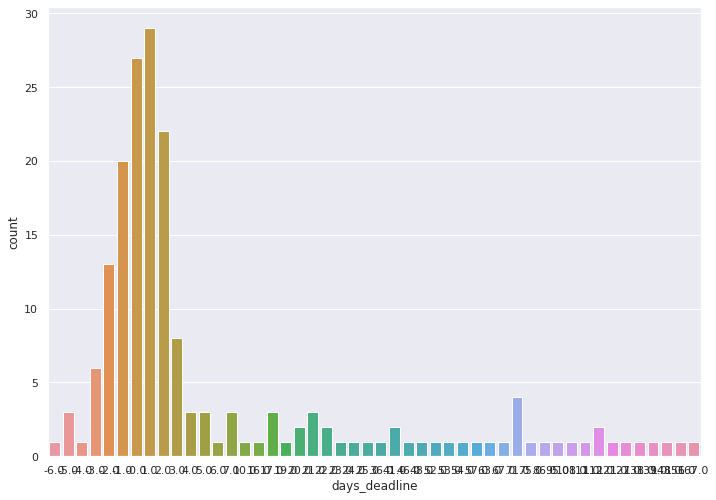

In [22]:
sns.countplot(id_ass_submitted_mean)

In [23]:
id_ass_24282 = student_assessments_data_frame.loc[student_assessments_data_frame["id_assessment"]==24282]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


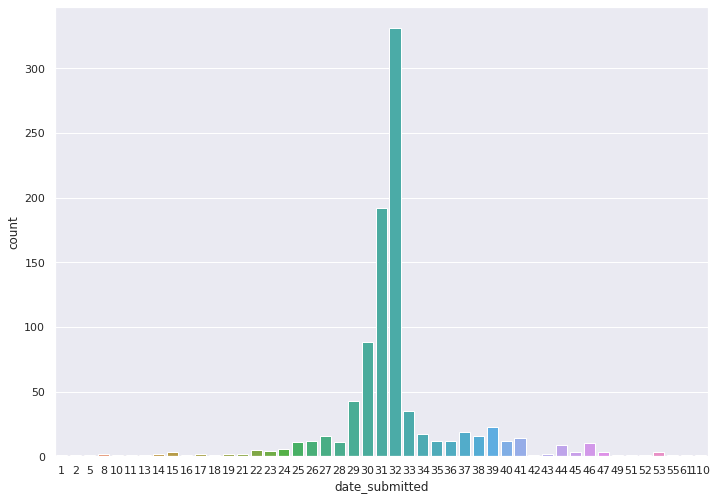

In [24]:
sns.countplot(id_ass_24282.date_submitted)

In [25]:
student_assessments_data_frame.loc[student_assessments_data_frame["id_student"]==592939]

,id_assessment,id_student,date_submitted,is_banked,score
46700,24282,592939,32,0,86.0
47570,24283,592939,103,0,47.0
49916,24286,592939,20,0,20.0
50486,24287,592939,69,0,76.0
132409,34886,592939,24,0,88.0
133914,34887,592939,52,0,68.0
134982,34888,592939,90,0,57.0
135496,34889,592939,142,0,NaN
142615,34899,592939,23,0,58.0
144787,34900,592939,52,0,76.0


In [26]:
student_assessments_data_frame.head()

,id_assessment,id_student,date_submitted,is_banked,score
0,1752,11391,18,0,78.0
1,1752,28400,22,0,70.0
2,1752,31604,17,0,72.0
3,1752,32885,26,0,69.0
4,1752,38053,19,0,79.0


In [27]:
student_assessments_data_frame.count()

id_assessment     173912
id_student        173912
date_submitted    173912
is_banked         173912
score             173739
dtype: int64

### Student Info

* code_module – an identification code for a module on which the student is registered.
* code_presentation - the identification code of the presentation during which the student is registered on the module.
* id_student – a unique identification number for the student.
* gender – the student’s gender.
* region – identifies the geographic region, where the student lived while taking the module-presentation.
* highest_education – highest student education level on entry to the module presentation.
* imd_band – specifies the Index of Multiple Depravation band of the place where the student lived during the module-presentation.
* age_band – band of the student’s age.
* num_of_prev_attempts – the number times the student has attempted this module.
* studied_credits – the total number of credits for the modules the student is currently studying.
* disability – indicates whether the student has declared a disability.
* final_result – student’s final result in the module-presentation.

### Student Taking Multiple Courses

In [28]:
counts = student_info_data_frame['id_student'].value_counts()
student_info_data_frame[student_info_data_frame['id_student'].isin(counts.index[counts > 3])]

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
1042,BBB,2013B,387276,F,North Western Region,Lower Than A Level,50-60%,35-55,1,180,N,Withdrawn
1788,BBB,2013B,542562,F,South East Region,A Level or Equivalent,60-70%,0-35,0,150,Y,Withdrawn
2822,BBB,2013J,387276,F,North Western Region,Lower Than A Level,50-60%,35-55,2,120,N,Withdrawn
3277,BBB,2013J,542562,F,South East Region,A Level or Equivalent,60-70%,0-35,1,270,Y,Withdrawn
4961,BBB,2014B,387276,F,North Western Region,Lower Than A Level,50-60%,35-55,3,120,N,Withdrawn
...,...,...,...,...,...,...,...,...,...,...,...,...
27834,FFF,2014J,279883,M,East Midlands Region,A Level or Equivalent,0-10%,0-35,0,180,N,Withdrawn
28322,FFF,2014J,591655,M,North Region,Lower Than A Level,70-80%,0-35,1,90,N,Fail
28330,FFF,2014J,592939,M,Scotland,HE Qualification,0-10%,0-35,2,90,N,Pass
30048,FFF,2014J,2681198,M,East Anglian Region,Lower Than A Level,70-80%,35-55,0,90,N,Pass


In [29]:
student_info_data_frame.loc[student_info_data_frame["id_student"]==592939]



,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
9690,CCC,2014B,592939,M,Scotland,HE Qualification,0-10%,0-35,0,240,N,Withdrawn
25416,FFF,2013J,592939,M,Scotland,HE Qualification,0-10%,0-35,0,240,N,Withdrawn
26767,FFF,2014B,592939,M,Scotland,HE Qualification,0-10%,0-35,1,240,N,Withdrawn
28330,FFF,2014J,592939,M,Scotland,HE Qualification,0-10%,0-35,2,90,N,Pass


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


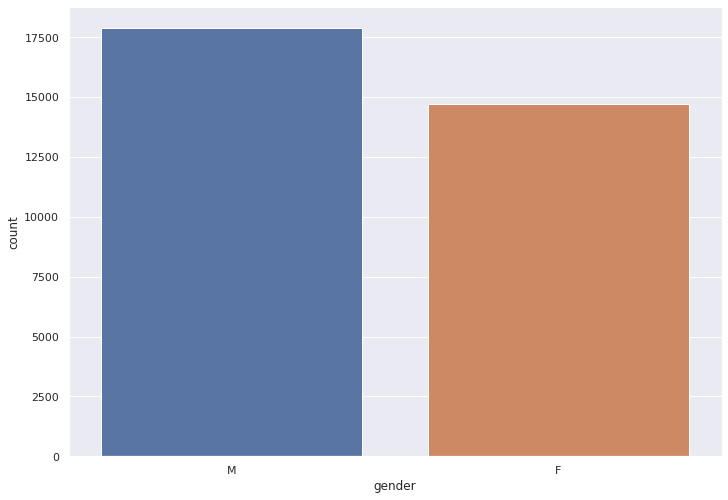

In [30]:
sns.countplot(student_info_data_frame.gender);    #this shows that courses data is almost equally distributed on gender

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


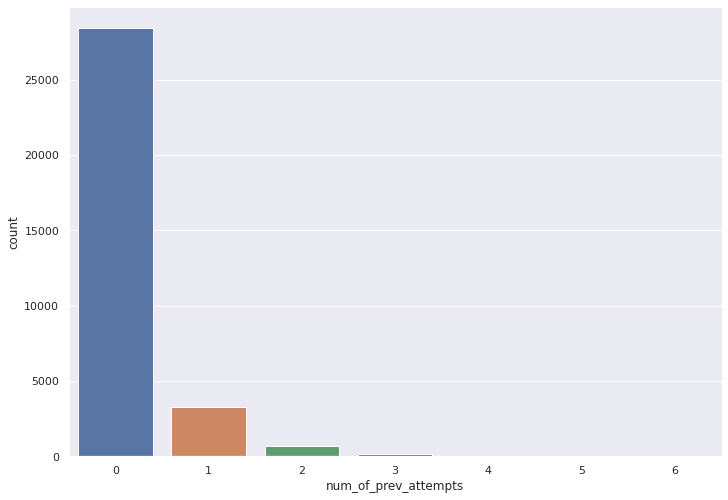

In [31]:
sns.countplot(student_info_data_frame.num_of_prev_attempts);

In [32]:
student_info_data_frame.head(10)

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass
5,AAA,2013J,38053,M,Wales,A Level or Equivalent,80-90%,35-55,0,60,N,Pass
6,AAA,2013J,45462,M,Scotland,HE Qualification,30-40%,0-35,0,60,N,Pass
7,AAA,2013J,45642,F,North Western Region,A Level or Equivalent,90-100%,0-35,0,120,N,Pass
8,AAA,2013J,52130,F,East Anglian Region,A Level or Equivalent,70-80%,0-35,0,90,N,Pass
9,AAA,2013J,53025,M,North Region,Post Graduate Qualification,NaN,55<=,0,60,N,Pass


In [33]:
student_info_data_frame.count()

code_module             32593
code_presentation       32593
id_student              32593
gender                  32593
region                  32593
highest_education       32593
imd_band                31482
age_band                32593
num_of_prev_attempts    32593
studied_credits         32593
disability              32593
final_result            32593
dtype: int64

### Student Registration

* code_module – an identification code for a module.
* code_presentation - the identification code of the presentation.
* id_student – a unique identification number for the student.
* date_registration – the date of student’s registration on the module presentation, this is the number of days measured relative to the start of the module-presentation (e.g. the negative value -30 means that the student registered to module presentation 30 days before it started).
* date_unregistration – date of student unregistration from the module presentation, this is the number of days measured relative to the start of the module-presentation. Students, who completed the course have this field empty. Students who unregistered have Withdrawal as the value of the final_result column in the studentInfo.csv file.

In [34]:
student_registration_data_frame.loc[student_registration_data_frame["id_student"]==65002]


,code_module,code_presentation,id_student,date_registration,date_unregistration
15,AAA,2013J,65002,-180.0,96.0
395,AAA,2014J,65002,-144.0,NaN


In [35]:
student_registration_data_frame.head()

,code_module,code_presentation,id_student,date_registration,date_unregistration
0,AAA,2013J,11391,-159.0,NaN
1,AAA,2013J,28400,-53.0,NaN
2,AAA,2013J,30268,-92.0,12.0
3,AAA,2013J,31604,-52.0,NaN
4,AAA,2013J,32885,-176.0,NaN


### Student VLE

* code_module – an identification code for a module.
* code_presentation - the identification code of the module presentation.
* id_student – a unique identification number for the student.
* id_site - an identification number for the VLE material.
* date – the date of student’s interaction with the material measured as the number of days since the start of the module-presentation.
* sum_click – the number of times a student interacts with the material in that day.

In [36]:
student_vle_data_frame.loc[student_vle_data_frame["id_student"]==65002].groupby(by=["code_presentation","id_student"])["sum_click"].sum()

code_presentation  id_student
2013J              65002         171
2014J              65002           5
Name: sum_click, dtype: int64

In [37]:
student_vle_data_frame.head()

,code_module,code_presentation,id_student,id_site,date,sum_click
0,AAA,2013J,28400,546652,-10,4
1,AAA,2013J,28400,546652,-10,1
2,AAA,2013J,28400,546652,-10,1
3,AAA,2013J,28400,546614,-10,11
4,AAA,2013J,28400,546714,-10,1


### VLE

* id_site – an identification number of the material.
* code_module – an identification code for module.
* code_presentation - the identification code of presentation.
* activity_type – the role associated with the module material.
* week_from – the week from which the material is planned to be used.
* week_to – week until which the material is planned to be used.

In [38]:
vle_data_frame.head()

,id_site,code_module,code_presentation,activity_type,week_from,week_to
0,546943,AAA,2013J,resource,NaN,NaN
1,546712,AAA,2013J,oucontent,NaN,NaN
2,546998,AAA,2013J,resource,NaN,NaN
3,546888,AAA,2013J,url,NaN,NaN
4,547035,AAA,2013J,resource,NaN,NaN


In [39]:
vle_data_frame.count()

id_site              6364
code_module          6364
code_presentation    6364
activity_type        6364
week_from            1121
week_to              1121
dtype: int64

In [40]:
vle_data_frame['activity_type'].unique()

array(['resource', 'oucontent', 'url', 'homepage', 'subpage', 'glossary',
       'forumng', 'oucollaborate', 'dataplus', 'quiz', 'ouelluminate',
       'sharedsubpage', 'questionnaire', 'page', 'externalquiz', 'ouwiki',
       'dualpane', 'repeatactivity', 'folder', 'htmlactivity'],
      dtype=object)

### Basic Statistics

In [41]:
df_course_stats = pd.DataFrame(student_info_data_frame.groupby(['code_module','code_presentation'], as_index=False).size(), columns=['student_count'])

In [42]:
# Student count in each course
df_course_stats

,student_count
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
5,NaN
6,NaN
7,NaN
8,NaN
9,NaN


#### Average score for each student


In [43]:
temp = student_assessments_data_frame.groupby(["id_student"], as_index=False)
mean_df = pd.DataFrame(temp["score"].mean())


In [44]:
mean_df

,id_student,score
0,6516,61.800000
1,8462,87.000000
2,11391,82.000000
3,23629,82.500000
4,23698,74.444444
...,...,...
23364,2698251,58.142857
23365,2698257,67.800000
23366,2698535,39.250000
23367,2698577,64.400000


In [45]:
student_vle_data_frame.head()

,code_module,code_presentation,id_student,id_site,date,sum_click
0,AAA,2013J,28400,546652,-10,4
1,AAA,2013J,28400,546652,-10,1
2,AAA,2013J,28400,546652,-10,1
3,AAA,2013J,28400,546614,-10,11
4,AAA,2013J,28400,546714,-10,1
